# Getting Started with the FT-AED Dataset

### 1. Import Necessary Packages

In [92]:
# Standard packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  
import matplotlib.cm as cm
import datetime

In [94]:
# Graph construction for machine learning (OPTIONAL)
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx
import torch

### 2. Load the Raw Data

In [2]:
data = pd.read_csv('nashville_freeway_anomaly.csv')
data.head()

,day,unix_time,milemarker,lane1_speed,lane1_volume,lane1_occ,lane2_speed,lane2_volume,lane2_occ,lane3_speed,lane3_volume,lane3_occ,lane4_speed,lane4_volume,lane4_occ,human_label,crash_record
0,1,1696237200,53.3,78.961609,1.0,2.0,69.764670,1.0,3.0,69.706978,2.0,3.0,70.552215,3.0,2.0,0,0
1,1,1696237200,53.6,79.790723,0.0,0.0,71.635426,3.0,6.0,68.905162,2.0,2.0,69.656292,2.0,1.0,0,0
2,1,1696237200,53.9,79.368922,2.0,1.0,72.041106,1.0,1.0,67.781606,1.0,1.0,68.702330,2.0,1.0,0,0
3,1,1696237200,54.1,78.403430,2.0,1.0,71.130999,2.0,1.0,66.139878,2.0,1.0,67.456241,4.0,5.0,0,0
4,1,1696237200,54.6,80.328382,2.0,1.0,71.544684,1.0,1.0,67.512503,3.0,8.0,65.819746,1.0,1.0,0,0


### 3. Visualizing a Day

Next, we demonstrate how to extract a day of data and visualize the features for that day.

In [33]:
# Extracting a single day of data
day1 = data[data['day'] == 1]

# Convering unix to a more human-readable date format
day1['time'] = pd.to_datetime(day1['unix_time'], unit='s') 
day1['time'] = day1['time'] - datetime.timedelta(hours=5) # convert to CDT

/tmp/ipykernel_309338/603990690.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day1['time'] = pd.to_datetime(day1['unix_time'], unit='s') - datetime.timedelta(hours=5)


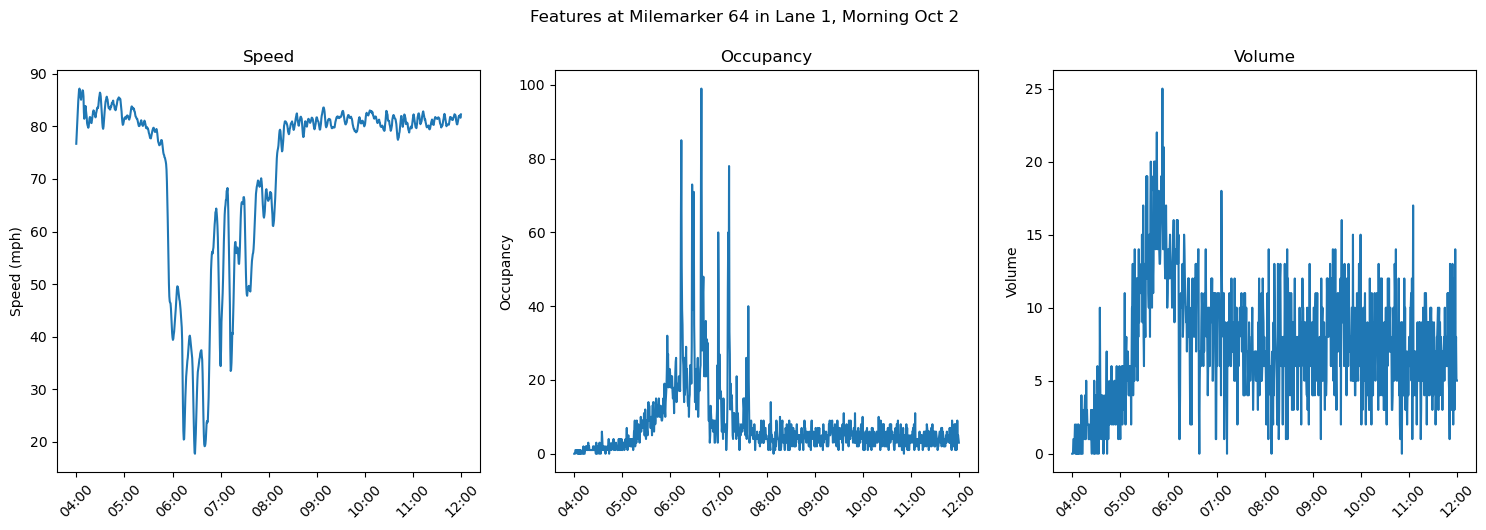

In [48]:
# Plotting speeds at a single location across time

mile64 = day1[day1['milemarker'] == 64]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

axs[0].plot(mile64['time'], mile64['lane1_speed'])
axs[0].set_title('Speed')
axs[0].set_ylabel('Speed (mph)')

axs[1].plot(mile64['time'], mile64['lane1_occ'])
axs[1].set_title('Occupancy')
axs[1].set_ylabel('Occupancy')

axs[2].plot(mile64['time'], mile64['lane1_volume'])
axs[2].set_title('Volume')
axs[2].set_ylabel('Volume')

for ax in axs:
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  

plt.tight_layout()
plt.suptitle("Features at Milemarker 64 in Lane 1, Morning Oct 2", y=1.05)
plt.show()

#### Crash report visualization

Crashes are the reported start time only. We do not know how long the effects last or when they actually occurred.

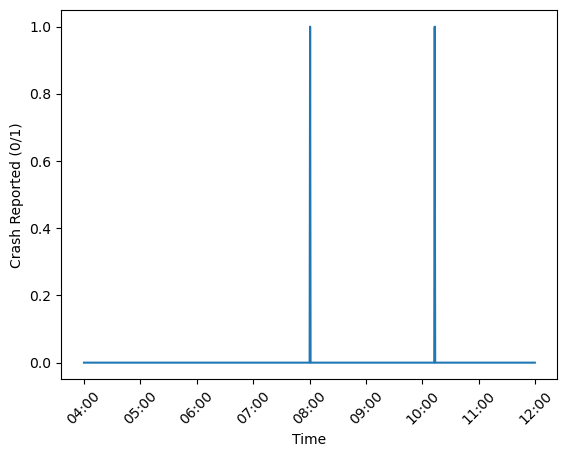

In [64]:
fig, ax = plt.subplots()

plt.plot(day1['time'], day1['crash_record'])

plt.xlabel("Time")
plt.ylabel("Crash Reported (0/1)")
plt.title("Crash Labels")

ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  

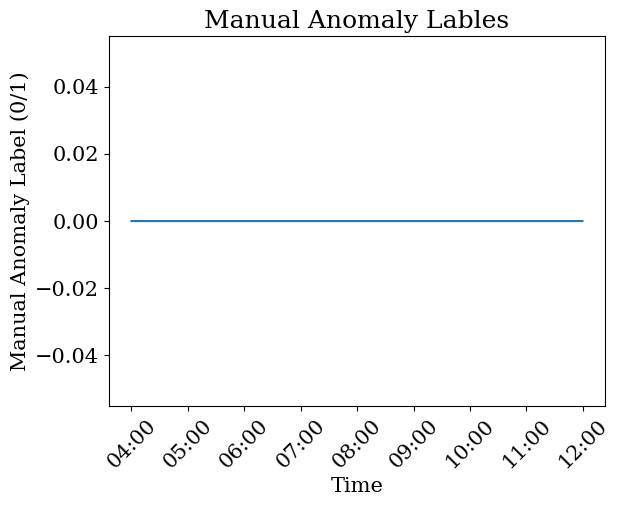

In [177]:
fig, ax = plt.subplots()

plt.plot(day1['time'], day1['human_label'])

plt.xlabel("Time")
plt.ylabel("Manual Anomaly Label (0/1)")
plt.title("Manual Anomaly Labels")

ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  

In [66]:
day1.columns

Index(['day', 'unix_time', 'milemarker', 'lane1_speed', 'lane1_volume',
       'lane1_occ', 'lane2_speed', 'lane2_volume', 'lane2_occ', 'lane3_speed',
       'lane3_volume', 'lane3_occ', 'lane4_speed', 'lane4_volume', 'lane4_occ',
       'human_label', 'crash_record', 'time'],
      dtype='object')

This only shows the features for a single location. To view features across all locations, we can use time space diagrams.

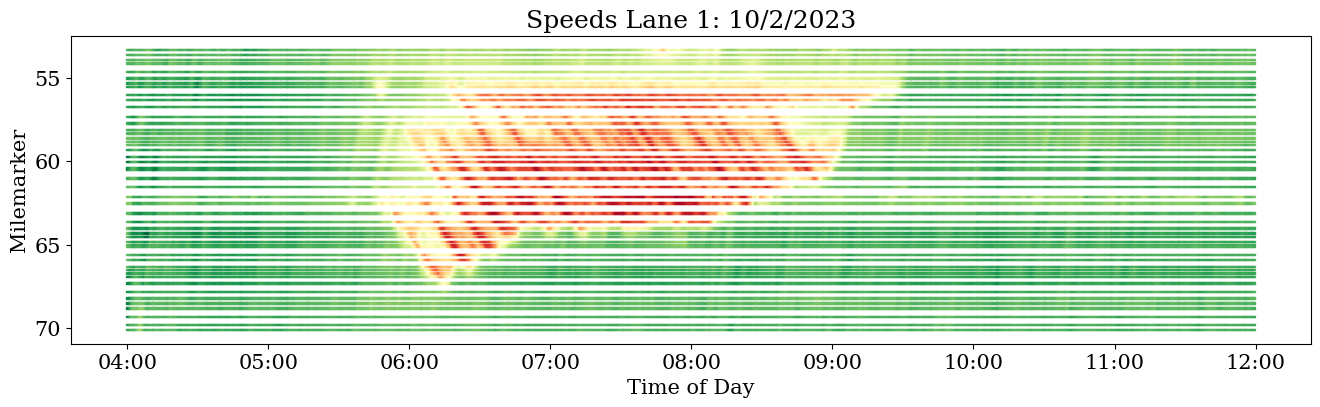

In [74]:
plt.figure(figsize=(16,4), facecolor='white')
plt.rc('font', family='serif', size=15)
plt.scatter(day1['time'], day1['milemarker'], 
                            c=day1['lane1_speed'],marker='s',s=1, cmap='RdYlGn')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.title(f"Speeds Lane 1: {day1['time'][0].month}/{day1['time'][0].day}/{day1['time'][0].year}")
plt.xlabel("Time of Day")
plt.ylabel("Milemarker")
plt.show()

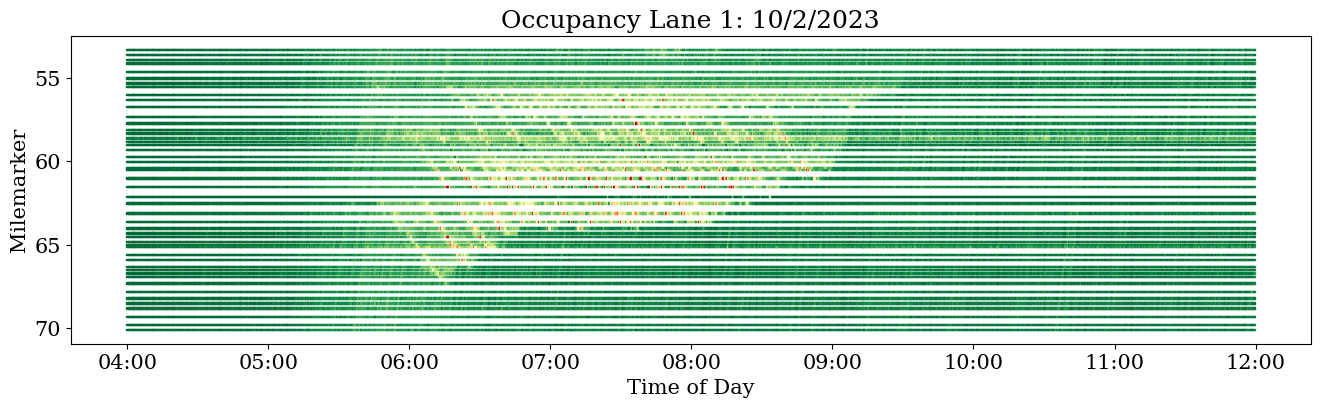

In [76]:
plt.figure(figsize=(16,4), facecolor='white')
plt.rc('font', family='serif', size=15)
plt.scatter(day1['time'], day1['milemarker'], 
                            c=day1['lane1_occ'],marker='s',s=1, cmap='RdYlGn_r')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.title(f"Occupancy Lane 1: {day1['time'][0].month}/{day1['time'][0].day}/{day1['time'][0].year}")
plt.xlabel("Time of Day")
plt.ylabel("Milemarker")
plt.show()

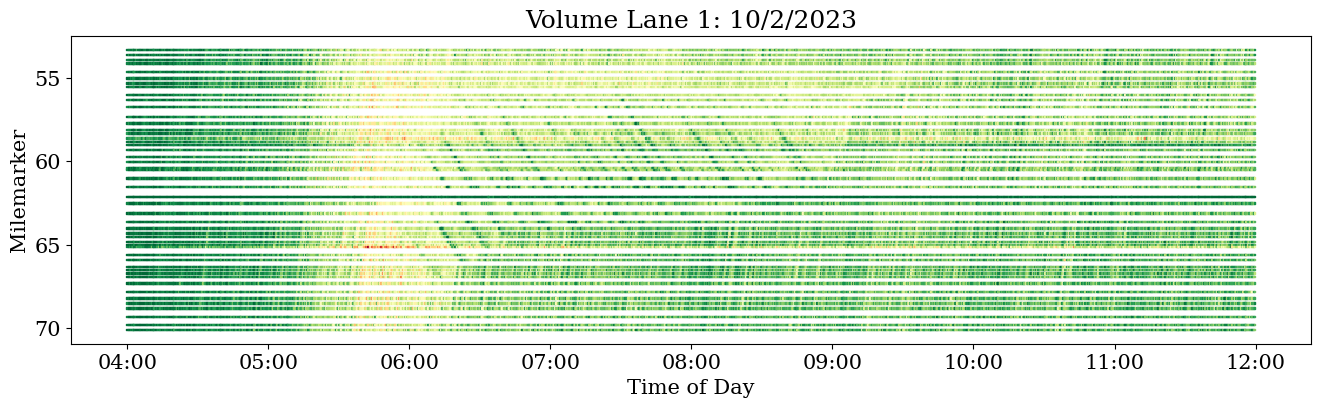

In [78]:
plt.figure(figsize=(16,4), facecolor='white')
plt.rc('font', family='serif', size=15)
plt.scatter(day1['time'], day1['milemarker'], 
                            c=day1['lane1_volume'],marker='s',s=1, cmap='RdYlGn_r')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.title(f"Volume Lane 1: {day1['time'][0].month}/{day1['time'][0].day}/{day1['time'][0].year}")
plt.xlabel("Time of Day")
plt.ylabel("Milemarker")
plt.show()

### 4. Building a Graph

Since this is a road network, you may prefer data in a graph structure. We demonstrate how to import the data into a simple graph where adjacent lanes are connected and nodes at adjacent milemarkers are connected. Intuitively, we expect a car to be able to move to an adjacent lane at the current milemarker and change to any lane at the next milemarker. Also, we assume that the impacts of traffic move in both directions, necessitating an undirected graph.

In [89]:
# Make dataframe "long" by collapsing the lanes into a single column
melted = pd.melt(day1, id_vars=['day', 'milemarker', 'human_label', 'crash_record', 'unix_time'], value_vars=['lane1_speed', 'lane2_speed', 'lane3_speed', 'lane4_speed'], value_name='speed').sort_values(['unix_time', 'milemarker']).drop('variable', axis=1)
melted2 = pd.melt(day1, id_vars=['day', 'milemarker', 'human_label', 'crash_record', 'unix_time'], value_vars=['lane1_occ', 'lane2_occ', 'lane3_occ', 'lane4_occ'], value_name='occ').sort_values(['unix_time', 'milemarker']).drop('variable', axis=1)
melted3 = pd.melt(day1, id_vars=['day', 'milemarker', 'human_label', 'crash_record', 'unix_time'], value_vars=['lane1_volume', 'lane2_volume', 'lane3_volume', 'lane4_volume'], value_name='volume').sort_values(['unix_time', 'milemarker']).drop('variable', axis=1)
melted['occ'] = melted2['occ']
melted['volume'] = melted3['volume']
day1long = melted

In [90]:
day1long.head()

,day,milemarker,human_label,crash_record,unix_time,speed,occ,volume
0,1,53.3,0,0,1696237200,78.961609,2.0,1.0
47040,1,53.3,0,0,1696237200,69.764670,3.0,1.0
94080,1,53.3,0,0,1696237200,69.706978,3.0,2.0
141120,1,53.3,0,0,1696237200,70.552215,2.0,3.0
1,1,53.6,0,0,1696237200,79.790723,0.0,0.0


In [81]:
# Generates edge connections based on nodes vehicles could travel to
def generate_edges(milemarkers):
    num_nodes = len(milemarkers)*4
    edge_connections = []
    for i in range(num_nodes-4):
        lane_location = i % 4
        
        if lane_location == 0:
            # This is the left-most lane
            edge_connections.append([i, i+1]) # node to the right
            edge_connections.append([i, i+4])
            edge_connections.append([i, i+5])
            edge_connections.append([i, i+6])
            edge_connections.append([i, i+7])
        if lane_location == 1:
            # This is the second lane
            edge_connections.append([i, i+1]) # node to the right
            edge_connections.append([i, i+3])
            edge_connections.append([i, i+4])
            edge_connections.append([i, i+5])
            edge_connections.append([i, i+6])
        if lane_location == 2:
            # This is the third lane
            edge_connections.append([i, i+1]) # node to the right
            edge_connections.append([i, i+2])
            edge_connections.append([i, i+3])
            edge_connections.append([i, i+4])
            edge_connections.append([i, i+5])
        if lane_location == 3:
            # This is the right-most lane
            edge_connections.append([i, i+1])
            edge_connections.append([i, i+2])
            edge_connections.append([i, i+3])
            edge_connections.append([i, i+4])
           
    
    edge_connections.append([num_nodes-4-1, num_nodes-3-1])
    edge_connections.append([num_nodes-3-1, num_nodes-2-1])
    edge_connections.append([num_nodes-2-1, num_nodes-1-1])
    edge_connections.append([num_nodes-1-1, num_nodes-1])
    
    edge_connections = torch.tensor(edge_connections)
    # Since undirected, also add the reverse of all edges
    edge_connections = torch.cat([edge_connections, edge_connections.flip(dims=[1])], dim=0)
    
    return edge_connections.T
    
# Make PyTorch Geometric Data graph object
def make_graph(dataset, milemarkers):
    features = ['occ', 'speed', 'volume']
    x = dataset[features]
    x = np.array(x)
    
    undirected_edges = generate_edges(milemarkers)
    node_features = torch.tensor(x, dtype=torch.float32)
    
    graph = Data(x=node_features, edge_index=undirected_edges)
    return graph

Generating graph for a single time instance

In [159]:
heavy_traffic_idx = day1long['speed'].idxmin()
heavy_traffic_time = day1long.loc[heavy_traffic_idx]['unix_time']
heavy_traffic = day1long[day1long['unix_time'] == heavy_traffic_time]

In [163]:
heavy_traffic

,day,milemarker,human_label,crash_record,unix_time,speed,occ,volume
22442,1,53.3,0,0,1696250940,45.032012,18.0,14.0
69482,1,53.3,0,0,1696250940,40.560689,19.0,14.0
116522,1,53.3,0,0,1696250940,34.017041,12.0,6.0
163562,1,53.3,0,0,1696250940,24.272798,52.0,7.0
22443,1,53.6,0,0,1696250940,51.533134,21.0,12.0
...,...,...,...,...,...,...,...,...
163609,1,69.8,0,0,1696250940,69.154050,2.0,3.0
22490,1,70.1,0,0,1696250940,81.125518,4.0,6.0
69530,1,70.1,0,0,1696250940,75.916367,6.0,9.0
116570,1,70.1,0,0,1696250940,70.897208,7.0,5.0


In [164]:
# X data
traffic_graph = make_graph(heavy_traffic, day1['milemarker'].unique())

# Y data, the human labels can supplement the official crash reports. 
# The human labels do not have delayed reporting.
# There is no overlap between the two.
crash_label = heavy_traffic['crash_record']
human_label = heavy_traffic['human_label']

In [175]:
# Plot a graph
def plot_traffic_graph(graph):
    undirected_networkx_graph = to_networkx(graph, to_undirected=True)

    intensity_values = graph.x[:, 1].numpy() / np.max(graph.x[:,1].numpy())

    # Define a colormap (viridis in this case)
    cmap = cm.RdYlGn

    node_colors = [cmap((value)) for value in intensity_values]
    
    rows = len(graph.x) // 4  # Calculate the number of rows in the grid
    cols = 4

    # Calculate positions for each node in the grid
    pos = {i: (i % cols, -i // cols) for i in range(len(graph.x))}
    labels = {i: i for i in range(len(graph.x))}  # Node labels

    fig = plt.figure(figsize=(7,25))
    ax = plt.subplot(111)
    # Draw nodes and edges
    nx.draw(undirected_networkx_graph, pos=pos, ax=ax, with_labels=True, labels=labels,
            node_color=node_colors, font_color='black')
    plt.title("Traffic Speed", fontsize=32)
    plt.show()

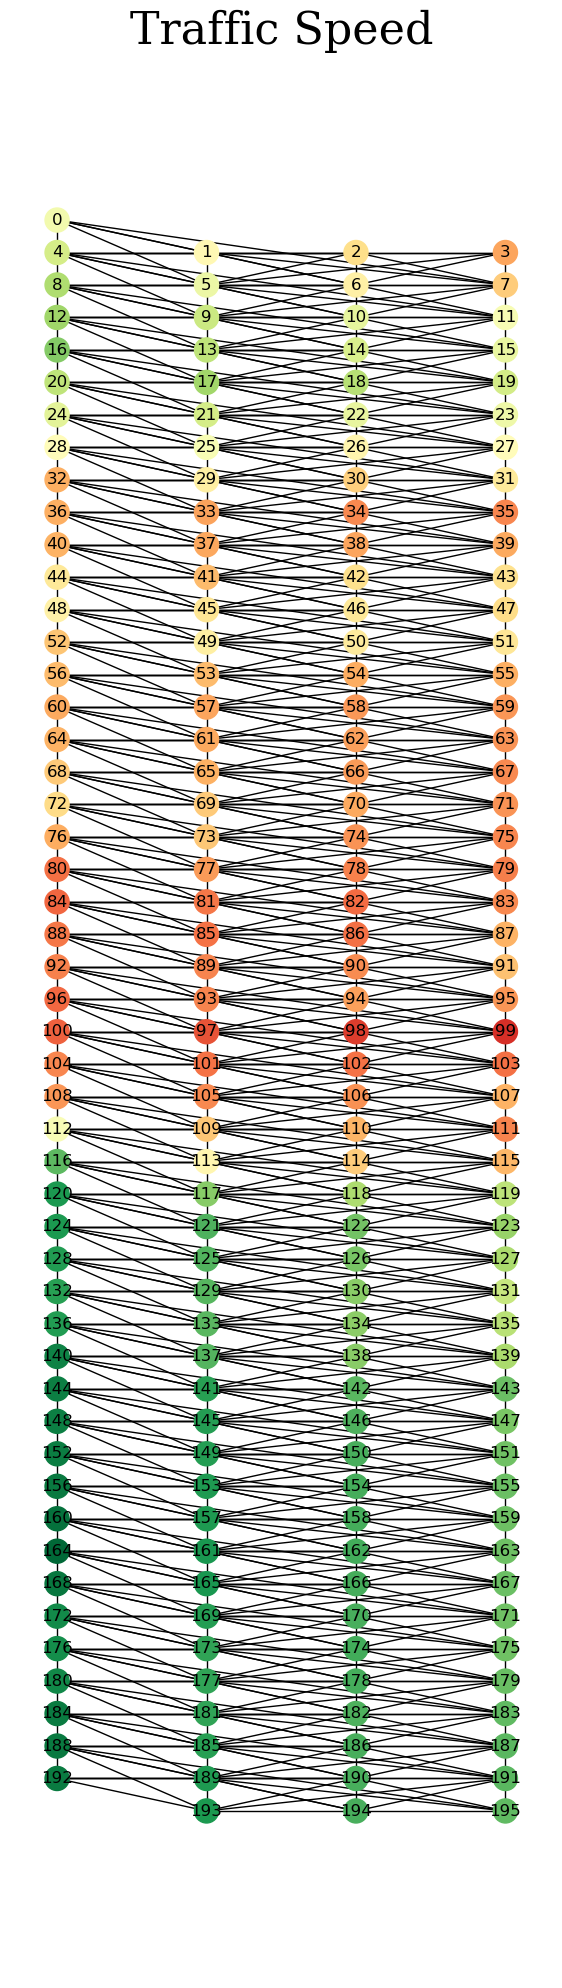

In [176]:
plot_traffic_graph(traffic_graph)